In [1]:
import json
from os.path import join as pjoin
import nltk
from nltk.tree import Tree
import re
import numpy as np

np.random.seed(123)

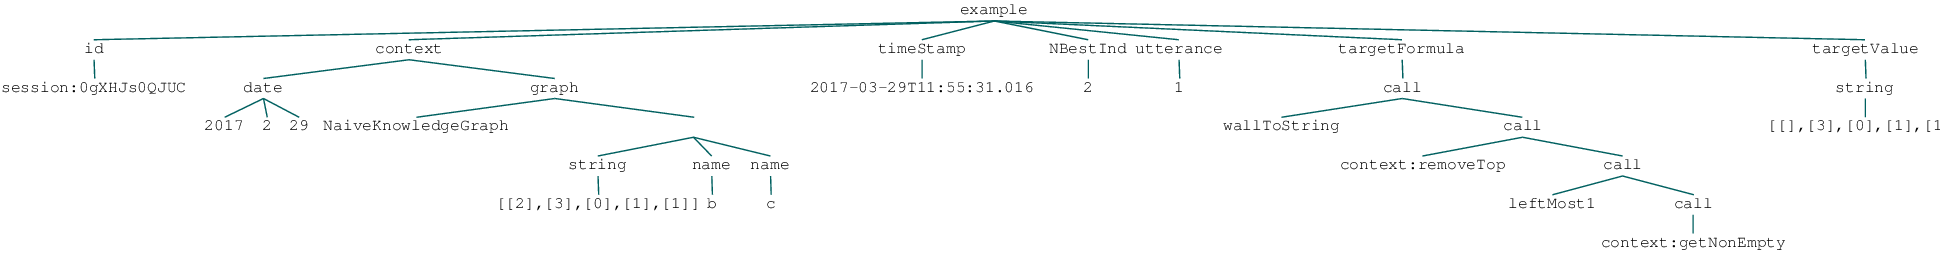

In [5]:
Tree.fromstring("""(example
  (id session:0gXHJs0QJUC)
  (context (date 2017 2 29) (graph NaiveKnowledgeGraph ((string [[2],[3],[0],[1],[1]]) (name b) (name c))))
  (timeStamp 2017-03-29T11:55:31.016)
  (NBestInd 2)
  (utterance 1)
  (targetFormula
    (call
      wallToString
      (call
        context:removeTop
        (call leftMost1 (call context:getNonEmpty))
      )
    )
  )
  (targetValue (string [[],[3],[0],[1],[1]]))
)""")

In [2]:
def data_from_lisp(filename):
    data = []
    with open(filename) as data_file:
        lisp_piece = []
        for line in data_file:
            if not line.startswith(')'):
                lisp_piece.append(line)
            else:
                lisp_piece.append(line)
                data.append(" ".join(lisp_piece))
                lisp_piece = []
    return data

In [3]:
trees = data_from_lisp(pjoin("data", "shrdlurn", "all.lisp"))

In [4]:
len(trees)

26907

In [5]:
print(trees[0])

(example
   (id session:01gnohKZUJJ)
   (context (date 2016 11 12) (graph NaiveKnowledgeGraph ((string [[2],[0],[2],[2],[1],[2],[3]]) (name b) (name c))))
   (timeStamp 2016-12-12T00:01:21.570)
   (NBestInd 3)
   (utterance "remove 7")
   (targetFormula
     (call
       edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
       (call
         context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop
         (call edu.stanford.nlp.sempre.cubeworld.StacksWorld.rightMost1 (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty))
       )
     )
   )
   (targetValue (string [[2],[0],[2],[2],[1],[2],[]]))
 )



In [26]:
print(trees[100])

(example
   (id session:0A5mIe1XeHr)
   (context (date 2016 7 11) (graph NaiveKnowledgeGraph ((string [[1],[3],[3],[1],[3],[1]]) (name b) (name c))))
   (timeStamp 2016-08-11T18:50:32.861)
   (NBestInd 2)
   (utterance "add orange to all")
   (targetFormula
     (call
       edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
       (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.stackOnTop (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty) (number 3 COLOR))
     )
   )
   (targetValue (string [[1,3],[3,3],[3,3],[1,3],[3,3],[1,3]]))
 )



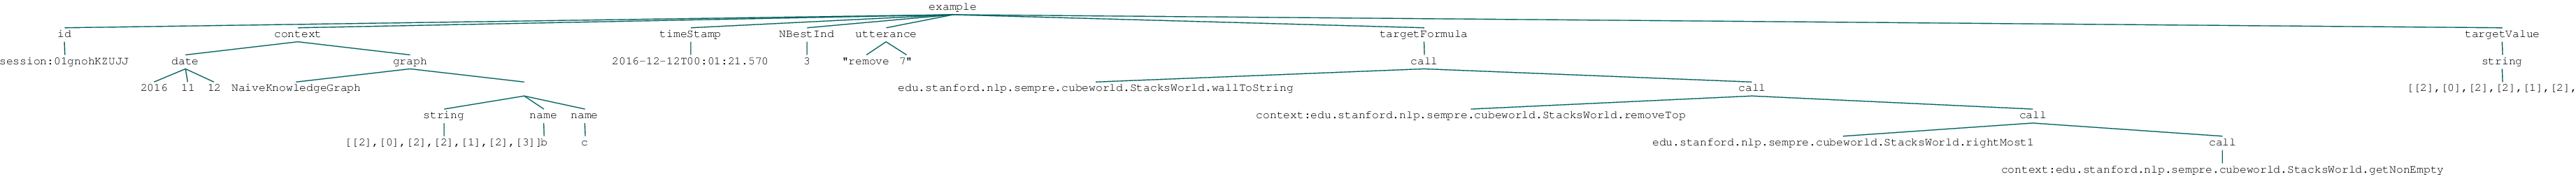

In [40]:
Tree.fromstring(trees[0])

   (targetFormula
     (call
       edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
       (call
         context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop
         (call edu.stanford.nlp.sempre.cubeworld.StacksWorld.rightMost1 (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty))
       )
     )
   )


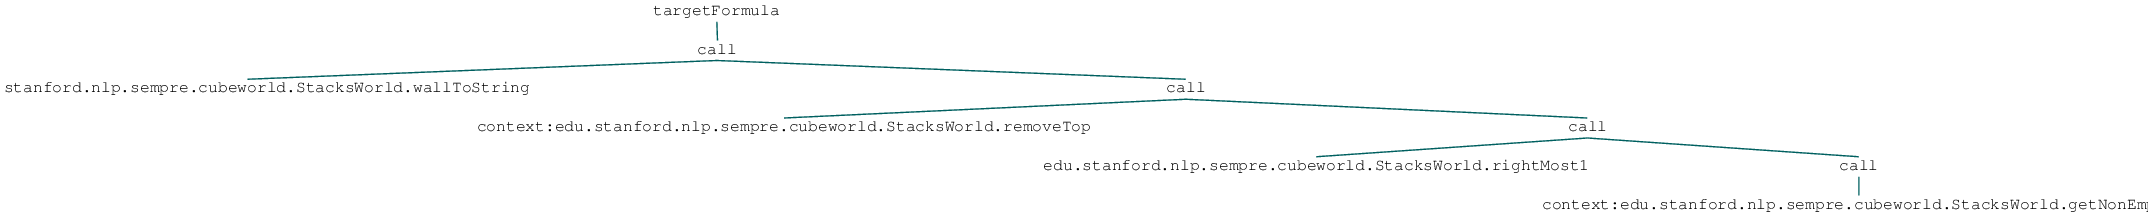

In [47]:
# parse targetFormula
formula = []  # can still use Tree.fromstring() to turn into logical form
cont = False
for line in trees[0].split('\n'):
    # start or continuation
    if "targetFormula" in line:
        formula.append(line)
        cont = True
    elif "targetValue" in line:
        cont = False
        
    elif cont:
        formula.append(line)

print('\n'.join(formula))
Tree.fromstring('\n'.join(formula))

In [20]:
# parse_list
s = "(context (date 2016 11 12) (graph NaiveKnowledgeGraph ((string [[2],[0],[2],[2],[1],[2],[3]]) (name b) (name c))))"
m = re.findall(r"\[([0-9_,]+)\]", s)
# I think this is exactl what I want...turn them into integers?
# keep in mind this string list actually...changes, not exactly the same length
m = [[int(i) for i in n.split(",")] for n in m]
print m
str_m = str(m)[1:-1]


['2', '0', '2', '2', '1', '2', '3']
[[2], [0], [2], [2], [1], [2], [3]]


In [40]:
s = "(targetValue (string [[1,3],[3,3],[3,3],[1,3],[3,3],[1,3]]))"
m = re.findall(r"\[([0-9_,]+)\]", s)
print m
# I think this is exactl what I want...turn them into integers?
# keep in mind this string list actually...changes, not exactly the same length

# m = [[int(i) for i in n.split(",")] for n in m]
# print m
str_m = []
for pair in m:
    str_m.append('[ ' + " ".join(pair.split(",")) + ' ] ')
str_m = "".join(str_m).strip()
print(str_m.split())

['1,3', '3,3', '3,3', '1,3', '3,3', '1,3']
['[', '1', '3', ']', '[', '3', '3', ']', '[', '3', '3', ']', '[', '1', '3', ']', '[', '3', '3', ']', '[', '1', '3', ']']


In [24]:
# sometimes the first element is empty...
s = "string [[0,0],[0,1],[0,0],[0,1],[0,0],[0,1]]"
m = re.findall(r"\[([0-9_,]+)\]", s)
m = [[int(i) for i in n.split(",")] for n in m]
print m

[[0, 0], [0, 1], [0, 0], [0, 1], [0, 0], [0, 1]]


In [34]:
# parse utterance
s = '(utterance "remove 7")'
m = re.findall(r'\"(.+?)\"', s)
print(m[0])

remove 7


In [3]:
"(id session:01gnohKZUJJ)".split("session:")[1][:-1]

'01gnohKZUJJ'

In [38]:
# what to extract:
# 1. context: extract the string [[2],[0],[2],[2],[1],[2],[3]], assume (name b) (name c) stays constant...
# 2. utterance: this is the NLI
# 3. targetFormula: Extract and linearize them (but remember to output parentheses? Remember to take out \n)
# 4. targetValue: we are having a prediction model

In [41]:
def parse_list(list_str):
    m = re.findall(r"\[([0-9_,]+)\]", list_str)
    m = [[int(i) for i in n.split(",")] for n in m]
    return m

def parse_utterance(s):
    m = re.findall(r'\"(.+?)\"', s)
    if len(m) == 0:
        return False
    return m[0]

def array_to_string(list_str):
    # only for context and TargetValue
    # strip beginning and end '[' and ']'
    # seperate '[' '3' ']'
    m = re.findall(r"\[([0-9_,]+)\]", list_str)
    str_m = []
    for pair in m:
        str_m.append('[ ' + " ".join(pair.split(",")) + ' ] ')
    str_m = "".join(str_m).strip()
    return str_m

def lisp_to_dict(lisps):
    list_dict = []

    for lisp in lisps:
        formula = []
        cont = False
        for line in lisp.split("\n"):
            if "session:" in line:
                session_id = line.split("session:")[1][:-1]
            if "NaiveKnowledgeGraph" in line:
                context = array_to_string(line)
            if "utterance" in line:
                utterance = parse_utterance(line)
            if "targetValue" in line:
                target_value = array_to_string(line)

            if "targetFormula" in line:
                formula.append(line)
                cont = True
            elif "targetValue" in line:
                cont = False
            elif cont:
                formula.append(line)
        
        if not utterance:
            continue
        
        formula = '\n'.join(formula)
        list_dict.append([session_id, context, utterance, formula, target_value])
        
    return list_dict


In [42]:
lists = lisp_to_dict(trees)

In [43]:
len(lists)

24890

In [44]:
print("context: ", lists[100][1], "future: ", lists[100][4])

('context: ', '[ 1 ] [ 3 ] [ 3 ] [ 1 ] [ 3 ] [ 1 ]', 'future: ', '[ 1 3 ] [ 3 3 ] [ 3 3 ] [ 1 3 ] [ 3 3 ] [ 1 3 ]')


In [47]:
str(lists[0])

"['01gnohKZUJJ', '[ 2 ] [ 0 ] [ 2 ] [ 2 ] [ 1 ] [ 2 ] [ 3 ]', 'remove 7', '   (targetFormula\\n     (call\\n       edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString\\n       (call\\n         context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop\\n         (call edu.stanford.nlp.sempre.cubeworld.StacksWorld.rightMost1 (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty))\\n       )\\n     )\\n   )', '[ 2 ] [ 0 ] [ 2 ] [ 2 ] [ 1 ] [ 2 ]']"

In [45]:
# save as a pickle file
import pickle
pickle.dump(lists, open(pjoin("data", "shrdlurn", "all.pkl"), 'wb'))

In [48]:
# save as an actual file (for checking)
with open(pjoin("data", "shrdlurn", "all.text"), 'w') as f:
    for l in lists:
        f.write(str(l) + "\n")

In [50]:
# save as all utterances
with open(pjoin("data", "shrdlurn", "all_utterance.text"), 'w') as f:
    for l in lists:
        f.write(l[2] + "\n")

In [51]:
# load the saved pickle file
import pickle
lists = pickle.load(open(pjoin("data", "shrdlurn", "all.pkl"), "rb"))

In [13]:
# Verify if we miscounted or not by doing Tree.fromstring()
# they all are valid
for l in lists:
    t = Tree.fromstring(l[3])

In [54]:
# Investigations on the data
# first: vocab, disjoint vocab on both source and target
# optional: only compute English-only 
len(lists)

24890

In [53]:
# tokenizer
def basic_tokenizer(sentence):
    words = []
    for space_separated_fragment in sentence.strip().split():
        words.extend(re.split(" ", space_separated_fragment))
    return [w for w in words if w]

In [6]:
basic_tokenizer(lists[0][3])

['(targetFormula',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.rightMost1',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty))',
 ')',
 ')',
 ')']

In [8]:
print(lists[0][3])

   (targetFormula
     (call
       edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
       (call
         context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop
         (call edu.stanford.nlp.sempre.cubeworld.StacksWorld.rightMost1 (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getNonEmpty))
       )
     )
   )


In [30]:
s = """
(targetFormula
    (call
      edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
      (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor (number 3 COLOR)))
    )
  )
"""

In [7]:
basic_tokenizer(s)

['(targetFormula',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor',
 '(number',
 '3',
 'COLOR)))',
 ')',
 ')']

In [11]:
s.split()

['(targetFormula',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor',
 '(number',
 '3',
 'COLOR)))',
 ')',
 ')']

In [13]:
'COLOR)))'.count(')')

3

In [68]:
s = """
(targetFormula
    (call
      edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString
      (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.stackOnTop (call context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor (number 3 COLOR)) (number 3 COLOR))
    )
  )
"""

In [15]:
s.split()

['(targetFormula',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.stackOnTop',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor',
 '(number',
 '3',
 'COLOR))',
 '(number',
 '3',
 'COLOR))',
 ')',
 ')']

In [58]:
# allow ending word to contain a ) parenthese
def postprocess(s_list):
    w_list = []
    for c in s_list:
        r_par = c.count(')')
        if r_par > 1:
            c = re.sub('\)\)+', ')', c)
            w_list.append(c)
            for _ in range(r_par - 1):
                w_list.append(')')
        else:
            w_list.append(c)
    
    return w_list

In [21]:
c = 'COLOR))'
re.sub('\)\)+', ')', c)

'COLOR)'

In [66]:
def strip_program_prefix(list_s):
    new_list = []
    for s in list_s:
        new_list.append(s.replace("edu.stanford.nlp.sempre.cubeworld.StacksWorld.", ""))
    return new_list

In [31]:
postprocess(basic_tokenizer(s))

['(targetFormula',
 '(call',
 'edu.stanford.nlp.sempre.cubeworld.StacksWorld.wallToString',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.removeTop',
 '(call',
 'context:edu.stanford.nlp.sempre.cubeworld.StacksWorld.getTopColor',
 '(number',
 '3',
 'COLOR)',
 ')',
 ')',
 ')',
 ')']

In [70]:
strip_program_prefix(postprocess(basic_tokenizer(s)))

['(targetFormula',
 '(call',
 'wallToString',
 '(call',
 'context:stackOnTop',
 '(call',
 'context:getTopColor',
 '(number',
 '3',
 'COLOR)',
 ')',
 '(number',
 '3',
 'COLOR)',
 ')',
 ')',
 ')']

In [62]:
_PAD = b"<pad>"
_SOS = b"<sos>"
_EOS = b"<eos>"
_UNK = b"<unk>"
_START_VOCAB = [_PAD, _SOS, _EOS, _UNK]

PAD_ID = 0
SOS_ID = 1
EOS_ID = 2
UNK_ID = 3

In [71]:
# TODO: add env_vocab list
import codecs
def create_vocabulary(list_s, root):
    print("Creating vocabulary %s from data")
    src_vocab = {}
    tgt_vocab = {}
    env_vocab = {}

    counter = 0

    for s in list_s:
        counter += 1
        if counter % 1000 == 0:
            print("processing line %d" % counter)

        # tokenize source
        src_tokens = src_tokenizer(s[2])  # hope this is enough
        
        # tokenize target
        tgt_tokens = strip_program_prefix(postprocess(basic_tokenizer(s[3])))
        
        # tokenize env
        # context [1], target [4]
        env_tokens = s[1].split() + s[4].split()

        for w in src_tokens:
            if w in src_vocab:
                src_vocab[w] += 1
            else:
                src_vocab[w] = 1
        
        for w in tgt_tokens:
            if w in tgt_vocab:
                tgt_vocab[w] += 1
            else:
                tgt_vocab[w] = 1
                
        for w in env_tokens:
            if w in env_vocab:
                env_vocab[w] += 1
            else:
                env_vocab[w] = 1

    src_vocab_list = _START_VOCAB + sorted(src_vocab, key=src_vocab.get, reverse=True)
    tgt_vocab_list = _START_VOCAB + sorted(tgt_vocab, key=tgt_vocab.get, reverse=True)
    env_vocab_list = _START_VOCAB + sorted(env_vocab, key=env_vocab.get, reverse=True)
    print("Source vocabulary size: %d" % len(src_vocab_list))
    print("Target vocabulary size: %d" % len(tgt_vocab_list))
    print("Env vocabulary size: %d" % len(env_vocab_list))
    
    with codecs.open(pjoin(root, "src_vocab.dat"), "w", encoding="utf-8") as vocab_file:
        for w in src_vocab_list:
            vocab_file.write(w + "\n")  # .encode('utf-8')
    with codecs.open(pjoin(root, "env_vocab.dat"), "w", encoding="utf-8") as vocab_file:
        for w in env_vocab_list:
            vocab_file.write(w + "\n")  # .encode('utf-8')
    with codecs.open(pjoin(root, "tgt_vocab.dat"), "w", encoding="utf-8") as vocab_file:
        for w in tgt_vocab_list:
            vocab_file.write(w + "\n")  # .encode('utf-8')

In [72]:
def src_tokenizer(s):
    words = basic_tokenizer(unicode(s))
    new_words = []
    for w in words:
        r = re.findall(r"[\w']+|[.,!?;\(\)]", w)
        if len(r) == 0:  # foreign words
            new_words.append(w)
        else:
            new_words.extend(r)
    return new_words

In [73]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

create_vocabulary(lists, pjoin("data", "shrdlurn"))

In [65]:
re.findall(r"[\w']+|[.,!?;\(\)]", "add(not(with(orange)),orange)")

['add', '(', 'not', '(', 'with', '(', 'orange', ')', ')', ',', 'orange', ')']

In [78]:
s = "あお　を　おく"

In [79]:
s.split()

['\xe3\x81\x82\xe3\x81\x8a\xe3\x80\x80\xe3\x82\x92\xe3\x80\x80\xe3\x81\x8a\xe3\x81\x8f']

In [97]:
unicode(s).split()

[u'\u3042\u304a', u'\u3092', u'\u304a\u304f']

In [74]:
from tensorflow.python.platform import gfile
def initialize_vocabulary(vocabulary_path):
    # map vocab to word embeddings
    if gfile.Exists(vocabulary_path):
        rev_vocab = []
        with gfile.GFile(vocabulary_path, mode="r") as f:
            rev_vocab.extend(f.readlines())
        rev_vocab = [line.strip('\n') for line in rev_vocab]
        vocab = dict([(x, y) for (y, x) in enumerate(rev_vocab)])
        return vocab, rev_vocab
    else:
        raise ValueError("Vocabulary file %s not found.", vocabulary_path)

In [75]:
src_vocab, rev_src_vocab = initialize_vocabulary(pjoin("data", "shrdlurn", "src_vocab.dat"))
tgt_vocab, rev_tgt_vocab = initialize_vocabulary(pjoin("data", "shrdlurn", "tgt_vocab.dat"))
env_vocab, rev_env_vocab = initialize_vocabulary(pjoin("data", "shrdlurn", "env_vocab.dat"))

In [76]:
len(rev_src_vocab)

1520

In [99]:
len(tgt_vocab)

21

In [87]:
# 2. Map source and target into indices, produce indicies files
def lists_to_indices(list_s, src_vocab, tgt_vocab, env_vocab):
    counter = 0
    tokenized_s = []
    for s in list_s:
        counter += 1
        if counter % 1000 == 0:
            print("tokenizing line %d" % counter)
        
        src_tokens = src_tokenizer(s[2])
        tgt_tokens = strip_program_prefix(postprocess(basic_tokenizer(s[3])))
        cxt_tokens = s[1].split()
        pred_tokens = s[4].split()
        
        src_token_ids = [src_vocab.get(w, UNK_ID) for w in src_tokens]
        tgt_token_ids = [tgt_vocab.get(w, UNK_ID) for w in tgt_tokens]
        cxt_tokens_ids = [env_vocab.get(w, UNK_ID) for w in cxt_tokens]
        pred_token_ids = [env_vocab.get(w, UNK_ID) for w in pred_tokens]
        
        tokenized_s.append([src_token_ids, tgt_token_ids, cxt_tokens_ids, pred_token_ids])

    return tokenized_s

In [85]:
np.random.shuffle(lists)

In [88]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

tokenized_s = lists_to_indices(lists, src_vocab, tgt_vocab, env_vocab)

In [81]:
len(tokenized_s)

24890

In [116]:
tokenized_s[0][0]

[4, 166]

In [118]:
[rev_src_vocab[w] for w in tokenized_s[0][0]]

['remove', '7']

In [83]:
tokenized_s[3][1]

[8, 5, 9, 5, 11, 5, 10, 7, 13, 6, 4, 4, 4, 4]

In [93]:
tokenized_s[3][2]

[4, 8, 5, 4, 8, 5, 4, 7, 5, 4, 7, 5, 4, 9, 5, 4, 8, 5]

In [82]:
tokenized_s[10][1]

[8, 5, 9, 5, 11, 5, 10, 7, 16, 6, 4, 4, 4, 4]

In [99]:
# side: investigate how many queries are repeating
tgt = [tokenized_s[i][1] for i in range(len(tokenized_s))]
len(tgt)

24890

In [100]:
from itertools import groupby
res = [(key, len(list(group))) for key, group in groupby(tgt)]

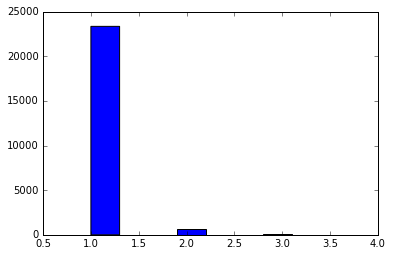

In [101]:
repeating = []
for r in res:
    repeating.append(r[1])

# visualize the "repeating" queries
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(repeating)
# this shows a tiny bit of repeating, but not much....hmmm? I thought they were all step-by-step tutorials? Shouldn't 
# there be more repeating queries?

In [174]:
bins

array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ])

In [ ]:
np.random.shuffle(tokenized_s)

In [94]:
# 3. split into train, val, test, save as pickle files
# source/target has cycles (since they are based on the same tutorial/session steps)
# need to randomize

def write_to_file(q, root, file_name, text_file=True, pkl_file=True):
    if pkl_file:
        file_path = pjoin(root, file_name + ".pkl")

        with open(file_path, mode="wb") as f:
            pickle.dump(q, f)

    if text_file:
        file_path = pjoin(root, file_name + ".txt")
        with open(file_path, mode="wb") as f:
            for pair in q:
                f.write(str(pair) + b"\n")

def create_dataset(q, root, prefix="", splits=(0.9, 0.05, 0.05), pkl_file=False, text_file=False):
    train_split, val_split, test_split = splits
    total = len(q)

    train_q = q[0:int(np.ceil(total * train_split))]
    val_q = q[int(np.ceil(total * train_split)):int(np.ceil(total * (train_split + val_split)))]
    test_q = q[int(np.ceil(total * (train_split + val_split))):]

    write_to_file(train_q, root, file_name=prefix + "_train", pkl_file=pkl_file, text_file=text_file)
    write_to_file(val_q, root, file_name=prefix + "_val", pkl_file=pkl_file, text_file=text_file)
    write_to_file(test_q, root, file_name=prefix + "_test", pkl_file=pkl_file, text_file=text_file)


In [95]:
create_dataset(tokenized_s, pjoin("data", "shrdlurn"), prefix="tokenized_s", text_file=True, pkl_file=True)

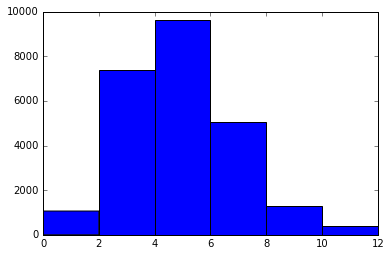

In [102]:
# look into the data imbalance issue?
# max length query
len_inp = map(lambda s: len(s[0]), tokenized_s)
len_query = map(lambda s: len(s[1]), tokenized_s)
ratio = np.array(len_query, dtype=np.float32) / np.array(len_inp, dtype=np.float32)
n, bins, patches = plt.hist(ratio, histtype="bar", bins=[0, 2, 4, 6, 8, 10, 12])

# this ratio is good